In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

In [62]:
def fitFunc(t, a, b, c):
    return a*np.exp(-b*t) + c

In [63]:
t = np.linspace(0,4,50)
temp = fitFunc(t, 2.5, 1.3, 0.5)
noisy = temp + 0.25*np.random.normal(size=len(temp))

In [64]:
fitParams, fitCovariance = curve_fit(fitFunc, t, noisy)
print(fitParams)
print(fitCovariance)

[ 2.45979834  1.25834676  0.45295518]
[[ 0.02129418  0.00834919 -0.00128173]
 [ 0.00834919  0.02730104  0.00828923]
 [-0.00128173  0.00828923  0.0045349 ]]


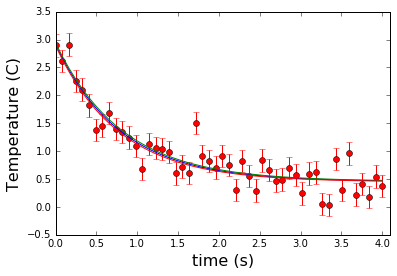

In [65]:
plt.ylabel('Temperature (C)', fontsize = 16)
plt.xlabel('time (s)', fontsize = 16)
plt.xlim(0,4.1)
# plot the data as red circles with vertical errorbars
plt.errorbar(t, noisy, fmt = 'ro', yerr = 0.2)
# now plot the best fit curve and also +- 1 sigma curves
# (the square root of the diagonal covariance matrix  
# element is the uncertianty on the fit parameter.)
sigma = [fitCovariance[0,0], \
         fitCovariance[1,1], \
         fitCovariance[2,2] \
         ]
plt.plot(t, fitFunc(t, fitParams[0], fitParams[1], fitParams[2]),\
         t, fitFunc(t, fitParams[0] + sigma[0], fitParams[1] - sigma[1], fitParams[2] + sigma[2]),\
         t, fitFunc(t, fitParams[0] - sigma[0], fitParams[1] + sigma[1], fitParams[2] - sigma[2]))


In [76]:
my_lambda = lambda t, b, c : fitFunc(t, a,b,c)

In [77]:
#to fix a variable

a = 2.4576982
popt, pcov = curve_fit(lambda t, b, c: fitFunc(t, a, b, c), t, noisy)
#popt, pcov = curve_fit(my_lambda, t, noisy)

In [70]:
def new_function(t, b, c):
    return fitFunc(t, a, b, c)

In [78]:
print(popt)
print(pcov)

[ 1.2573806   0.45302941]
[[ 0.02354448  0.00862065]
 [ 0.00862065  0.00437133]]


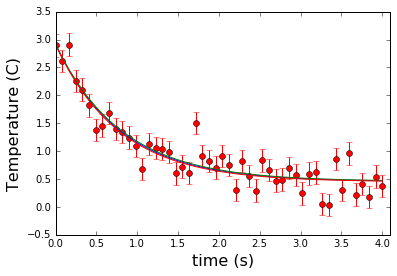

In [79]:
plt.ylabel('Temperature (C)', fontsize = 16)
plt.xlabel('time (s)', fontsize = 16)
plt.xlim(0,4.1)
# plot the data as red circles with vertical errorbars
plt.errorbar(t, noisy, fmt = 'ro', yerr = 0.2)

sigma = [pcov[0,0], \
         pcov[1,1]]

plt.plot(t, new_function(t, popt[0], popt[1]),\
         t, new_function(t, popt[0] - sigma[0], popt[1] + sigma[1]),\
         t, new_function(t, popt[0] + sigma[0], popt[1] - sigma[1]))

